In [18]:
from openai import OpenAI
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

client = OpenAI(
    api_key=""
)

model='text-embedding-ada-002'

def embedded(word):
    return np.array(client.embeddings.create(input=word, model=model).data[0].embedding).reshape(1, -1)

In [20]:
king = embedded('king')
man = embedded('man')
woman = embedded('woman')
queen = embedded('queen')

# x = np.array(embedded('padthai')).reshape(1, -1)
def similar(w1, w2):
    return cosine_similarity(embedded(w1), embedded(w2))
print(similar('i love cats', 'i love a cat'))
print(similar('bush administration', '911 terrorist'))
print(similar('bush administration', '911 terrorist'))
print(similar('i love cats', 'def segmentation(w2: String): lambda'))

[[0.97680427]]
[[0.76256205]]
[[0.65813551]]


In [27]:
print(similar('but what do you think about the jews?', 'nazi scheme'))
print(similar('but what do you think about the jews?', 'disneyland'))
print(similar('disneyland', 'corporate capitalism'))

[[0.77882983]]
[[0.72297588]]
[[0.75342955]]


In [30]:
import pandas as pd 
import numpy as np

x = ['but what do you think about the jews?', 'nazi scheme', 'king', 'queen', 'disneyland', 'corporate capitalism', 'i love dogs', 'i love my dog']
arr = np.asarray([ embedded(i)[0] for i in x ])
pd.DataFrame(arr).to_csv('test.csv')    

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('test.csv')
 
# print first five rows of df
print(df.head(4))
 
# save the labels into a variable l.
l = df['Unnamed: 0']
 
# Drop the label feature and 
# store the pixel data in d.
d = df.drop("Unnamed: 0", axis=1)

   Unnamed: 0         0         1         2         3         4         5  \
0           0 -0.009977 -0.021234 -0.004767 -0.031992 -0.021951  0.024667   
1           1 -0.021864 -0.025804  0.008414 -0.022948 -0.024992  0.029189   
2           2  0.010191 -0.004016  0.007364 -0.011632 -0.031883  0.018589   
3           3 -0.004499 -0.006726 -0.002519 -0.018191 -0.016877  0.010452   

          6         7         8  ...      1526      1527      1528      1529  \
0  0.003413 -0.003688 -0.015369  ...  0.008600  0.012058  0.009932 -0.024103   
1 -0.029839 -0.028701 -0.014581  ...  0.008272 -0.002843  0.050281 -0.012279   
2 -0.014880 -0.031442 -0.006406  ...  0.003167 -0.025153  0.016383 -0.011625   
3 -0.007725 -0.024302 -0.017324  ...  0.004509 -0.017800  0.013458 -0.024414   

       1530      1531      1532      1533      1534      1535  
0 -0.029456  0.043237  0.000696  0.006090  0.010361 -0.013704  
1 -0.055318  0.023069 -0.015488  0.000302 -0.008455 -0.023300  
2 -0.036379  0.015445

In [36]:
from sklearn.preprocessing import StandardScaler
 
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(8, 1536)


AttributeError: PathCollection.set() got an unexpected keyword argument 'z'

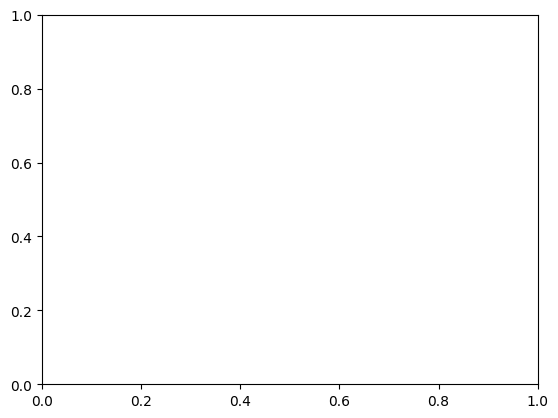

In [44]:

# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized_data[0:1000, :]
labels_1000 = l[0:1000]
 
model = TSNE(n_components = 3, random_state = 0, perplexity=2)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000
 
tsne_data = model.fit_transform(data_1000)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "Dim_3", "label"))

import seaborn as sn
# Plotting the result of tsne
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()